In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
ttv_fit = pd.read_csv('./SWIFT/koi3678_posterior_forecaster/MAP_times.txt')

ttv_fit_times = ttv_fit['MAP times in KBJD-277:'].values+277


In [111]:
ttv_data = pd.read_csv('./TTVs/koi3678.csv')


ttv_data_times =  ttv_data['tts_median [KBJD]']
ttv_data_ttvs =  ttv_data['ttvs_median [min] ']

ttv_data_times_err =  np.array([ttv_data['tts_err lower [days]'],
                                ttv_data['tts_err upper [days]']])

ttv_data_ttvs_err =  np.array([ttv_data['ttvs_err lower [min]'],
                               ttv_data['ttvs_err upper [min]']])

koi3678_period = ttv_data['P_median [days]'][0]
koi3678_t0 = ttv_data['t0_median [KBJD]'][0]

In [112]:
time = koi3678_t0
ttv_fit_ttvs=[]
for ii in range(0, len(ttv_fit_times)):
    ttv_fit_ttvs.append((ttv_fit_times[ii]-time)*24*60)
    print(ttv_data_ttvs[ii])
    print(ttv_fit_ttvs[ii])
    print('')
    
    time += koi3678_period

0.2608004676039854
0.4428515480776696

-2.711733495370936
-2.320562764098213

4.861511127000995
4.131625779882597

-6.659425011721396
-6.841780108406965

3.543649822613588
3.6034859024766774

2.473332628942444
2.642902862498886

-4.257884373309935
-4.380090091945021

7.508980081511254
7.452390842918248

-5.1175942933878105
-4.947276300263184



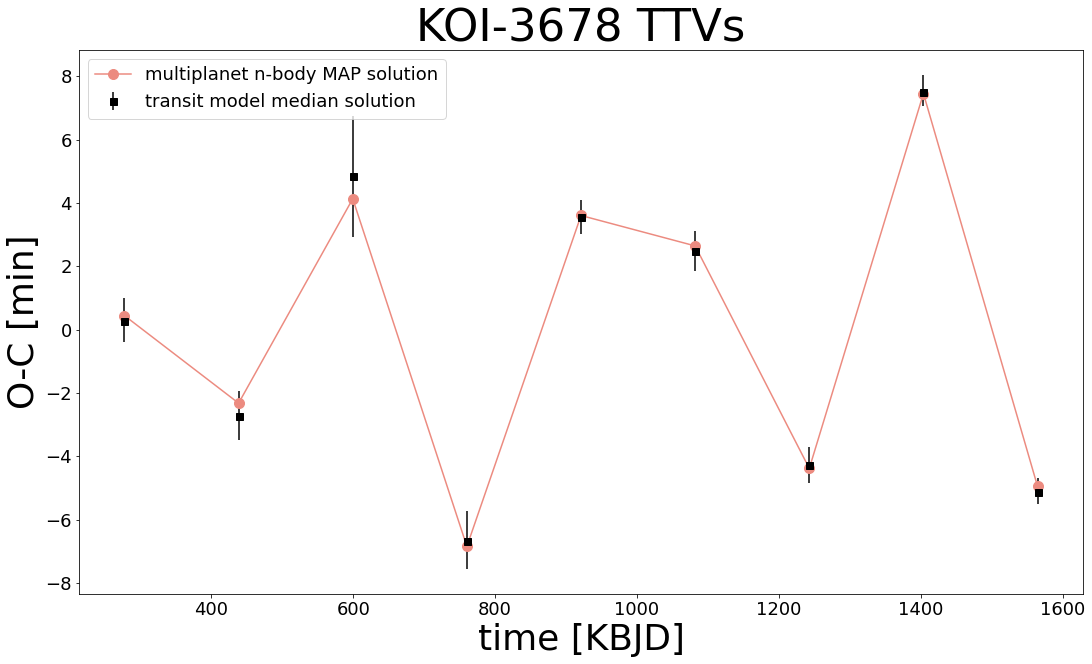

In [113]:
plt.figure(figsize=[18,10])
plt.errorbar(ttv_data_times, ttv_data_ttvs, yerr = ttv_data_ttvs_err, ls= '', marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(ttv_data_times, ttv_fit_ttvs, 'o', ls='-', ms=10, color='#EC8B80', zorder=2, label = 'multiplanet n-body MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig('swift_fit_forecaster.pdf')

In [94]:
ttv_luna_times = np.array([55110.5053980755, 55271.387750126465, 55432.27927184613,55593.154983394976, 
                           55754.0458671042, 55914.92908921068, 56075.80890208772, 56236.70173781406, 56397.57792229926])
ttv_luna_times = ttv_luna_times-54833

time = koi3678_t0
ttv_luna_ttvs=[]
for ii in range(0, len(ttv_luna_times)):
    ttv_luna_ttvs.append((ttv_luna_times[ii]-time)*24*60)
    print(ttv_data_ttvs[ii])
    print(ttv_luna_ttvs[ii])
    print('')
    
    time += koi3678_period
    
    


0.2608004676039854
0.05540394605304755

-2.711733495370936
-2.9981966309514974

4.861511127000995
7.1525257116081775

-6.659425011721396
-5.463397919229465

3.543649822613588
3.768589391511341

2.473332628942444
1.9678687514533522

-4.257884373309935
-4.74214227822813

7.508980081511254
7.3007496734499

-5.1175942933878105
-4.634145613417786



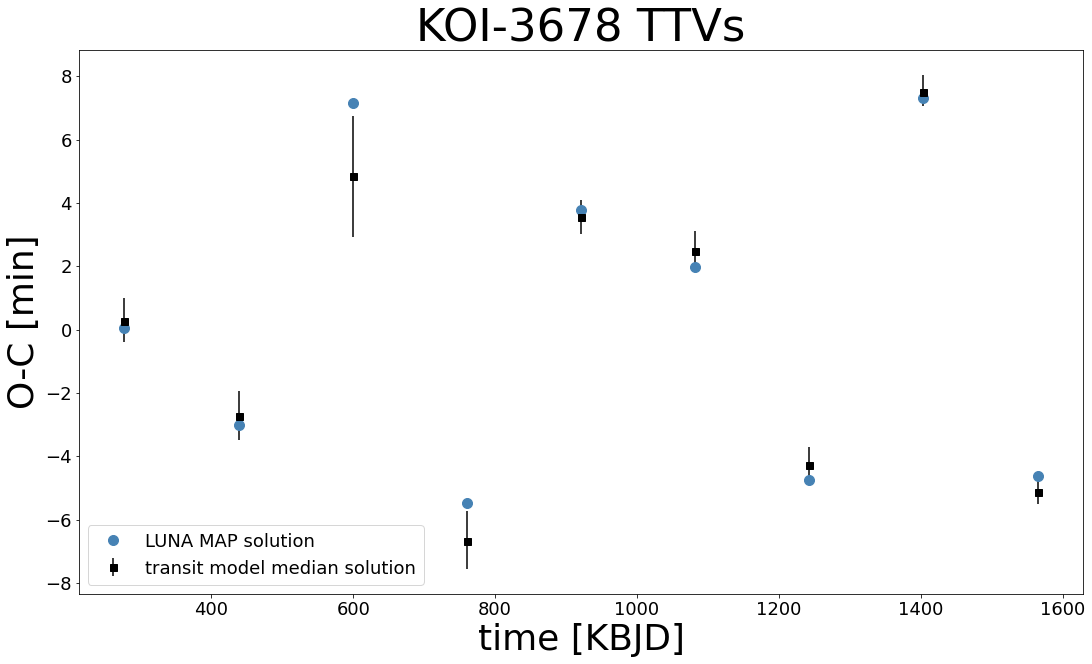

In [99]:
plt.figure(figsize=[18,10])
plt.errorbar(ttv_data_times, ttv_data_ttvs, yerr = ttv_data_ttvs_err, ls= '', marker='s', color = 'k', ms=7, label='transit model median solution')
plt.plot(ttv_data_times, ttv_luna_ttvs, 'o', ms=10, color='#4682B4', zorder=2, label = 'LUNA MAP solution')


plt.title('KOI-3678 TTVs', fontsize=45)
plt.ylabel('O-C [min]', fontsize=36)
plt.xlabel('time [KBJD]', fontsize=36)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.savefig('luna_fit.pdf')